### Initial data pull to being plotting graphs

In [2]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import squarify
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
import numpy as np
import seaborn as sns
import matplotlib as mp

sns.set_style("white")

from pprint import pprint
from config import api_key

In [3]:
#Convert Gold Tier 1 URL to DF
gold_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/I?page=1&api_key=" + api_key
gold_data = requests.get(gold_url).json()
gold_data_df = pd.DataFrame(gold_data)

#Convert Gold Tier 2 URL to DF
gold_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/II?page=1&api_key=" + api_key
gold_data2 = requests.get(gold_url2).json()
gold_data_df2 = pd.DataFrame(gold_data2)

#Convert Gold Tier 3 URL to DF
gold_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/III?page=1&api_key=" + api_key
gold_data3 = requests.get(gold_url3).json()
gold_data_df3 = pd.DataFrame(gold_data3)

#Convert Gold Tier 4 URL to DF
gold_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/GOLD/IV?page=1&api_key=" + api_key
gold_data4 = requests.get(gold_url4).json()
gold_data_df4 = pd.DataFrame(gold_data4)

#Merge all DF into one using Concat
GDF = [gold_data_df, gold_data_df2, gold_data_df3, gold_data_df4]
gold_df = pd.concat(GDF)

#Drop unneeded columns - Clean Gold DF
clean_gold_df = gold_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all Gold summoner ids to a list
gold_summonerId_list = list(gold_df['summonerId'])

#Convert Platinum Tier 1 URL to DF
platinum_url = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/I?page=1&api_key=" + api_key
platinum_data = requests.get(platinum_url).json()
platinum_data_df = pd.DataFrame(platinum_data)

#Convert Platinum Tier 2 URL to DF
platinum_url2 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/II?page=1&api_key=" + api_key
platinum_data2 = requests.get(platinum_url2).json()
platinum_data_df2 = pd.DataFrame(platinum_data2)

#Convert Platinum Tier 3 URL to DF
platinum_url3 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/III?page=1&api_key=" + api_key
platinum_data3 = requests.get(platinum_url3).json()
platinum_data_df3 = pd.DataFrame(platinum_data3)

#Convert Platinum Tier 4 URL to DF
platinum_url4 = "https://na1.api.riotgames.com/lol/league-exp/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=" + api_key
platinum_data4 = requests.get(platinum_url4).json()
platinum_data_df4 = pd.DataFrame(platinum_data4)

#Merge all DF into one using Concat
PDF = [platinum_data_df, platinum_data_df2, platinum_data_df3, platinum_data_df4]
platinum_df = pd.concat(PDF)

#Drop unneeded columns - Clean Platinum DF
clean_platinum_df = platinum_df.drop(columns=['queueType', 'summonerName', 'inactive', 'freshBlood', 'hotStreak', 'miniSeries'])

#Add all platinum summoner ids to a list
platinum_summonerId_list = list(platinum_df['summonerId'])

KeyError: "['queueType' 'summonerName' 'inactive' 'freshBlood' 'hotStreak'\n 'miniSeries'] not found in axis"

### Looped through first page of 100 summonerId to have data on individual users

In [ ]:
#Looping through top 100 summoners in Gold Tier and outputting data for champion they last used.
gold_summonerId = gold_summonerId_list[:100]

first_championID_list_gold = []
for i in gold_summonerId:
    gold_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + i + "?api_key=" + api_key
    response = requests.get(gold_url2).json()
    first_championID_gold = response[0]
    first_championID_list_gold.append(first_championID_gold)
    
first_championID_list_gold_DF = pd.DataFrame(first_championID_list_gold)

#Looping through top 100 summoners in Platinum Tier and outputting data for champion they last used.
platinum_summonerId = platinum_summonerId_list[:100]

first_championID_list_platinum = []
for j in platinum_summonerId:
    platinum_url2 = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + j + "?api_key=" + api_key
    response2 = requests.get(platinum_url2).json()
    first_championID_platinum = response2[0]
    first_championID_list_platinum.append(first_championID_platinum)
    
first_championID_list_plat_DF = pd.DataFrame(first_championID_list_platinum)

first_championID_list_plat_DF

### Pull Data from DataDragon to create DF of Champion name with their ChampionID and Primary Role

In [4]:
#Pull Data from DataDragon to create DF of Champion name with their ChampionID
champions_data = pd.read_json(r'file:///Users/jw/Downloads/dragontail-10.21.1/10.21.1/data/en_US/champion.json')

#Initialising_dictionary
champion_dict = champions_data['data']

#Split Dictionary into Keys and Values
character = []
values = []
items = champion_dict.items()
for item in items:
    character.append(item[0]), values.append(item[1])

ID = []
for v in values:
    ID.append(v['key'])

Role = []
for x in values:
    Role.append(x['tags'][0])

champion_data_1 = pd.DataFrame({"Champion Name": character, "championId": ID, "Primary Role": Role})

#change data type to int64 - in order to merge 
champion_data_1['championId'] = champion_data_1['championId'].astype(str).astype(int).round(0)

### Make full dataframes for Each Tier based on full data subset- in order to begin analyzing

In [6]:
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

#Make Full Iron DF - Ready for analysis
final_iron_df = full_summoner_mastery[full_summoner_mastery["tier"] == "IRON"]

#Merge full Iron DF with champion data
iron_combined_df = pd.merge(final_iron_df, champion_data_1, how = 'left', on = 'championId')

#Delete duplicate column
del iron_combined_df["Champion Name_x"]

#Rename column
iron_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full bronze DF - ready for analysis
final_bronze_df = full_summoner_mastery[full_summoner_mastery["tier"] == "BRONZE"]

bronze_combined_df = pd.merge(final_bronze_df, champion_data_1, how = 'left', on = 'championId')

del bronze_combined_df["Champion Name_x"]

bronze_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make Full Silver DataFrame - Ready for analysis
final_silver_df = full_summoner_mastery[full_summoner_mastery["tier"] == "SILVER"]

silver_combined_df = pd.merge(final_silver_df, champion_data_1, how = 'left', on = 'championId')

del silver_combined_df["Champion Name_x"]

silver_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full gold DF - ready for analysis
full_summoner_mastery = pd.read_csv('summoner_champion.csv')

final_gold_df = full_summoner_mastery[full_summoner_mastery["tier"] == "GOLD"]

gold_combined_df = pd.merge(final_gold_df, champion_data_1, how = 'left', on = 'championId')

del gold_combined_df["Champion Name_x"]

gold_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Make full platinum DataFrame - everything we need for analysis
final_platinum_df = full_summoner_mastery[full_summoner_mastery["tier"] == "PLATINUM"]

platinum_combined_df = pd.merge(final_platinum_df, champion_data_1, how = 'left', on = 'championId')

del platinum_combined_df["Champion Name_x"]

platinum_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

#Full DataFrame for Diamond, Master, GrandMaster and Challenger - combined into one
Diamond = full_summoner_mastery[full_summoner_mastery["tier"] == "DIAMOND"]
Master = full_summoner_mastery[full_summoner_mastery["tier"] == "MASTER"]
Grandmaster = full_summoner_mastery[full_summoner_mastery["tier"] == "GRANDMASTER"]
Challenger = full_summoner_mastery[full_summoner_mastery["tier"] == "CHALLENGER"]

DMGC = [Diamond, Master, Grandmaster, Challenger]
DMGC_df = pd.concat(DMGC)

DMGC_combined_df = pd.merge(DMGC_df, champion_data_1, how = 'left', on = 'championId')


del DMGC_combined_df["Champion Name_x"]

DMGC_combined_df.rename(columns = {'Champion Name_y':'Champion Name'}, inplace = True)

### Iron Tier Analysis

- Iron TreeMap

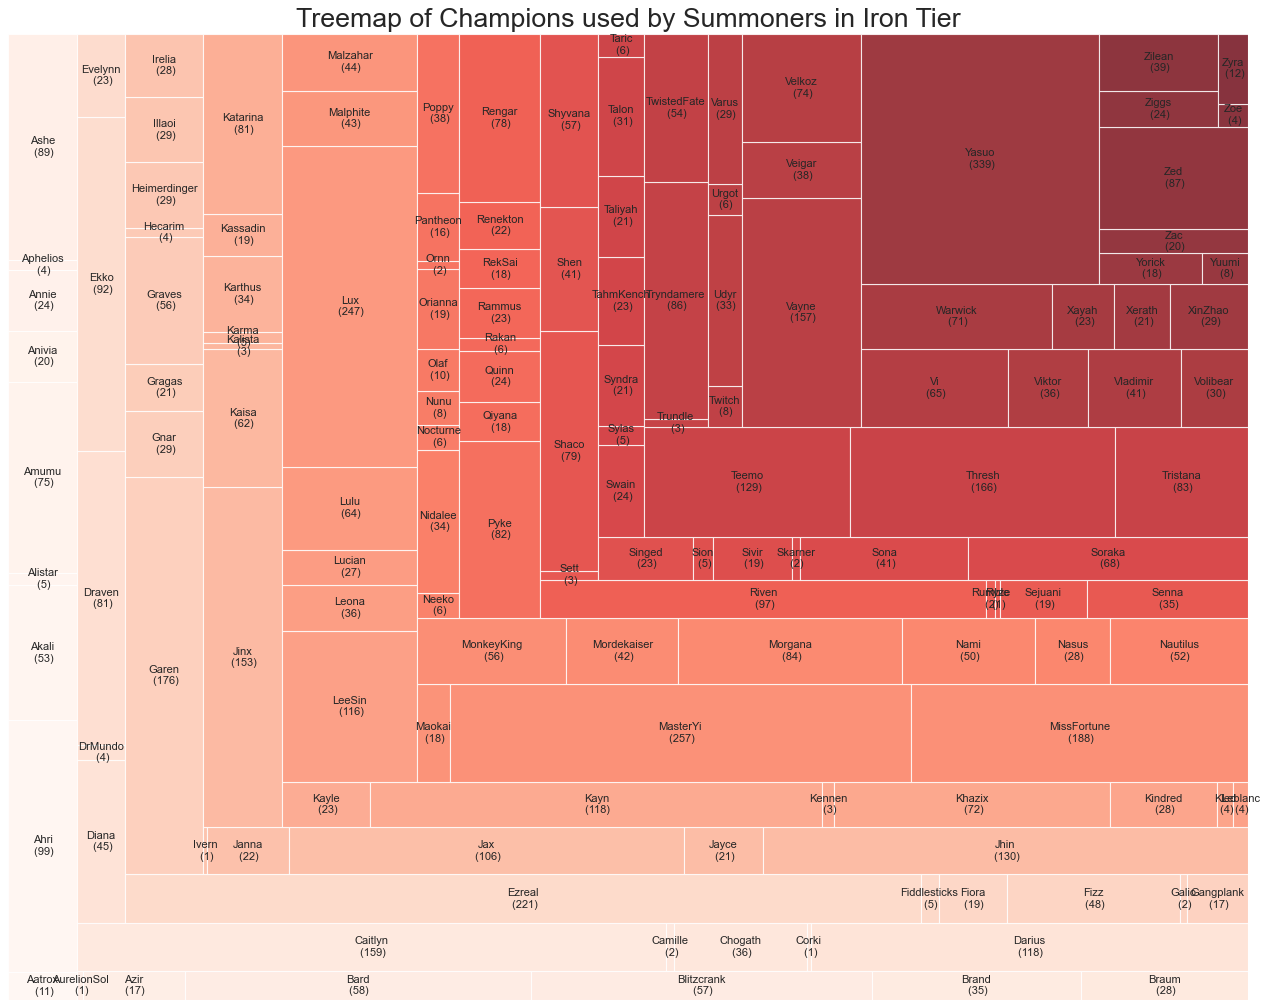

In [13]:
#Make Iron Iron TreeMap
treemap_1 = iron_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Reds')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Iron Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Iron_Treemap.png")

- Iron Bar Chart

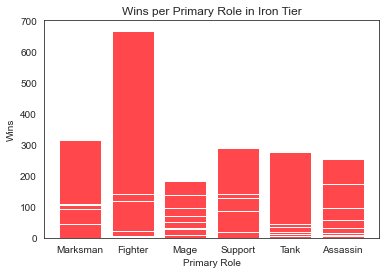

In [14]:
role = iron_combined_df['Primary Role']
wins = iron_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light red')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Iron Tier')
plt.show()

- Iron PieChart

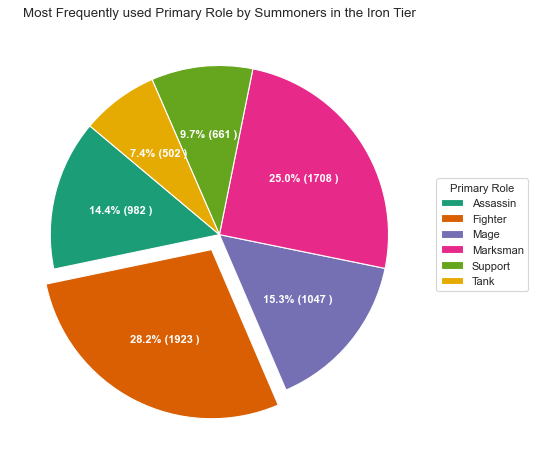

In [15]:
# Prepare Data
pie = iron_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Iron Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Iron_PieChart.png")

plt.show()

- Iron ScatterPlot

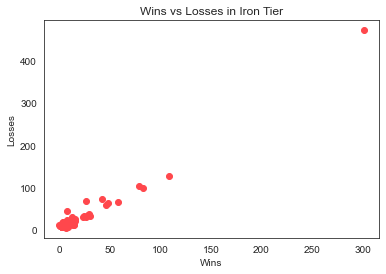

In [24]:
#wins vs losses from top 100 in randomized gold subset
wins = iron_combined_df['wins'][:100]
loss = iron_combined_df['losses'][:100]
plt.scatter(wins, loss, color = 'xkcd:light red')
plt.xlabel("Wins")
plt.ylabel("Losses")
plt.title("Wins vs Losses in Iron Tier")
plt.show()

### Bronze Analysis

- Bronze TreeMap

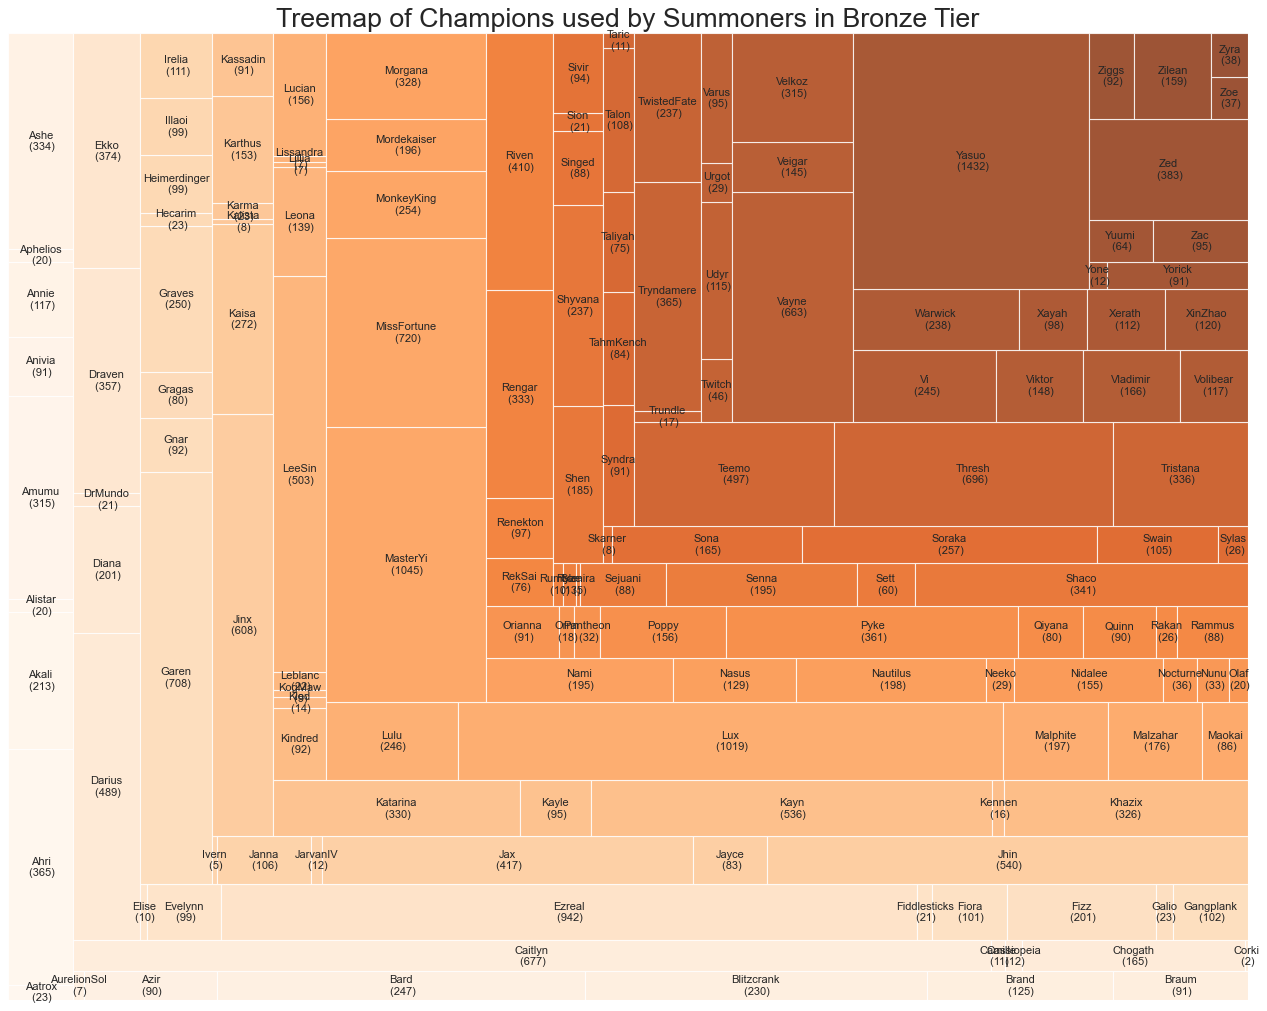

In [16]:
#Bronze TreeMap
treemap_1 = bronze_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Oranges')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Bronze Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Bronze_Treemap.png")

- Bronze Bar Chart

TypeError: 'value' must be an instance of str or bytes, not a float

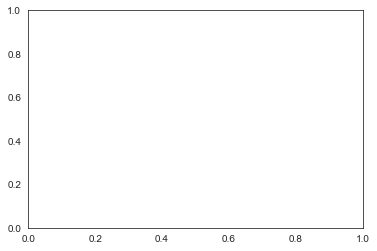

In [17]:
#Bronze Bar Chart - only one that wont work???
role = bronze_combined_df['Primary Role']
wins = bronze_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:tangerine')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Bronze Tier')
plt.show()

- Bronze PieChart

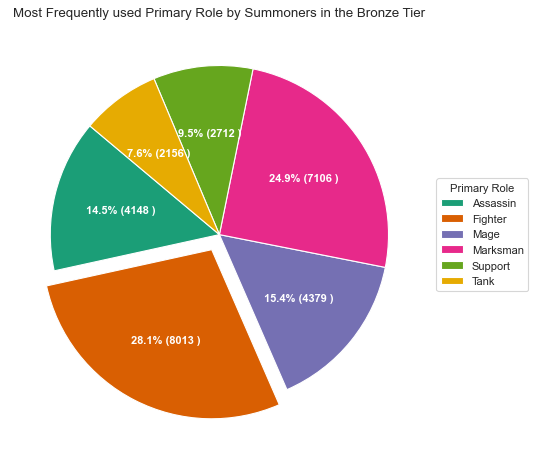

In [18]:
# Prepare Data
pie = bronze_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Bronze Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Bronze_PieChart.png")

plt.show()

- Bronze Scatter Plot

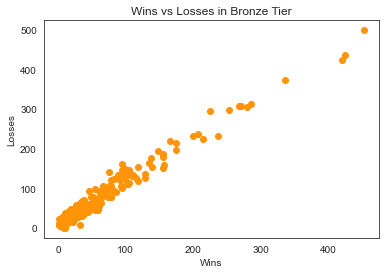

In [37]:
#wins vs losses from top 100 in randomized gold subset
wins = bronze_combined_df['wins'][:1681]
loss = bronze_combined_df['losses'][:1681]
plt.scatter(wins, loss, color = 'xkcd:tangerine')
plt.xlabel("Wins")
plt.ylabel("Losses")
plt.title("Wins vs Losses in Bronze Tier")
plt.show()

### Silver Tier Analysis

- Silver TreeMap

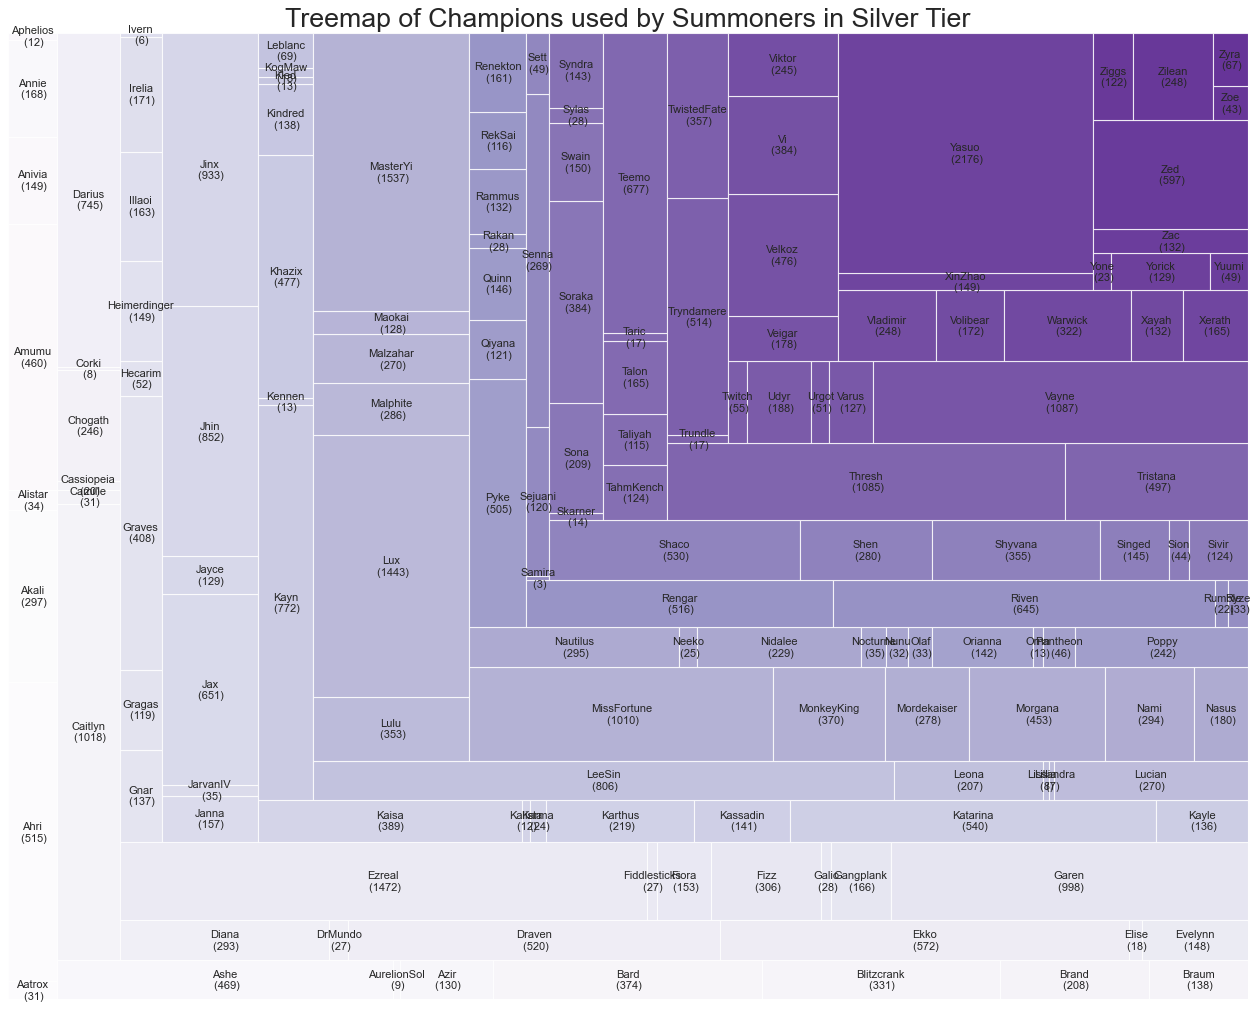

In [38]:
#Silver TreeMap
treemap_1 = silver_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Purples')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Silver Tier', fontsize=24)
plt.axis('off')

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Silver_Treemap.png")

- Silver BarChart

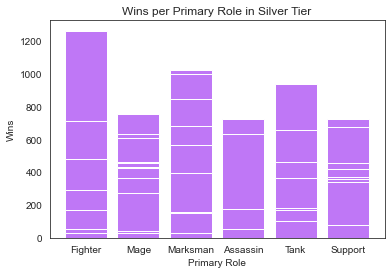

In [39]:
role = silver_combined_df['Primary Role']
wins = silver_combined_df['wins']

plt.bar(role,wins, align = "center", color= 'xkcd:light purple')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Silver Tier')
plt.show()

- Silver PieChart

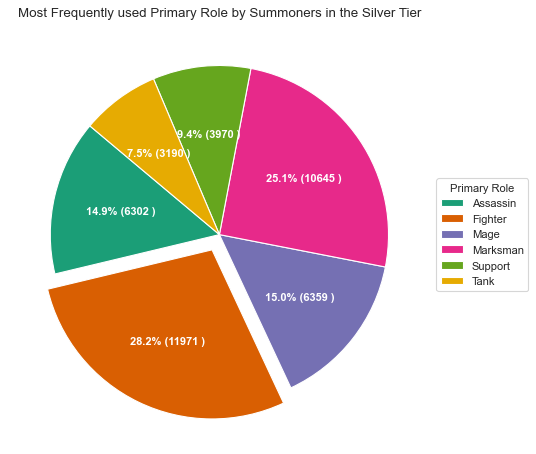

In [40]:
# Prepare Data
pie = silver_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in the Silver Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Silver_PieChart.png")

plt.show()

- Silver ScatterPlot

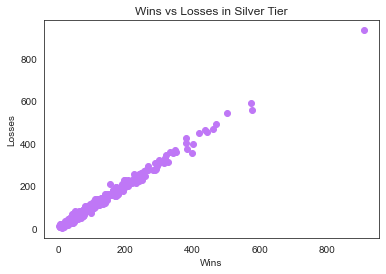

In [44]:
#wins vs losses from top 100 in randomized silver subset
wins = silver_combined_df['wins'][:2552]
loss = silver_combined_df['losses'][:2552]
plt.scatter(wins, loss, color = 'xkcd:light purple')
plt.xlabel("Wins")
plt.ylabel("Losses")
plt.title("Wins vs Losses in Silver Tier")
plt.show()

In [45]:
wins

0       44
1       43
2       46
3       19
4       20
        ..
2547    59
2548    59
2549    59
2550    59
2551    59
Name: wins, Length: 2552, dtype: int64

- Silver Avg Wins and Losses

### Gold Tier Analysis

- Gold TreeMap

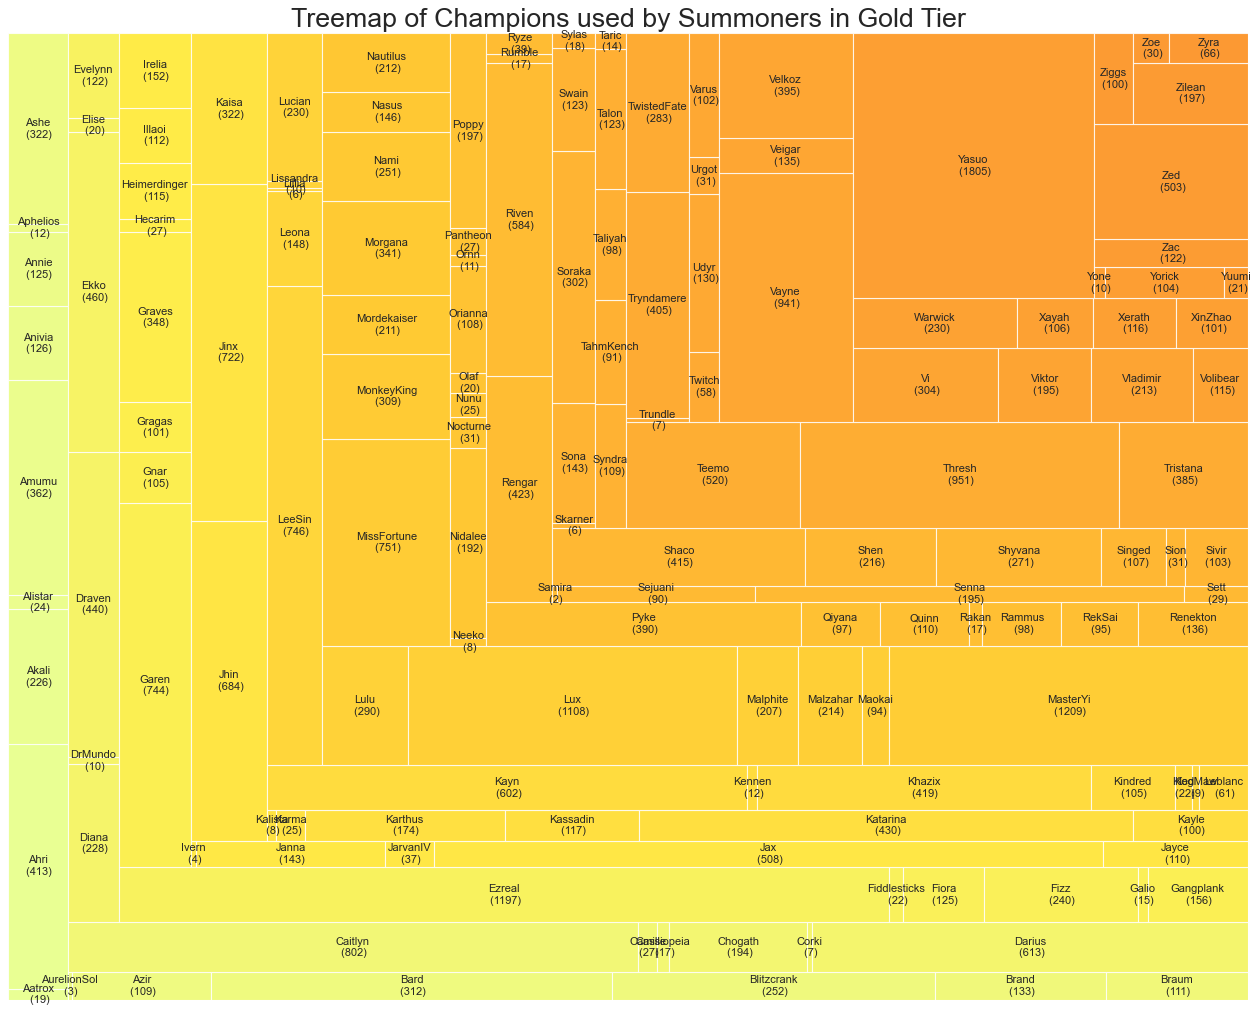

In [7]:
#TreeMap of Summoners in Gold Tier
treemap_1 = gold_combined_df.groupby('Champion Name').size().reset_index(name='counts')
labels = treemap_1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = treemap_1['counts'].values.tolist()
colors = [plt.get_cmap('Wistia')(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(20,16), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Champions used by Summoners in Gold Tier', fontsize=24)
plt.axis('off')


plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Gold_Treemap.png")

- Gold PieChart

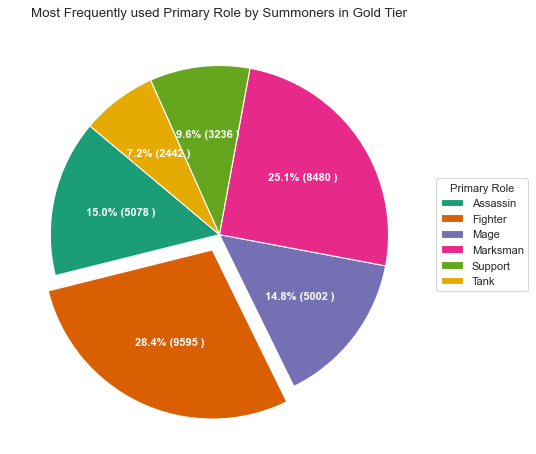

In [8]:
# Prepare Data
pie = gold_combined_df.groupby('Primary Role').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = pie['counts']
categories = pie['Primary Role']
explode = [0,0.1,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Primary Role", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Most Frequently used Primary Role by Summoners in Gold Tier")

plt.savefig("/Users/jw/Desktop/Group-3-Project/images/Gold_PieChart.png")

plt.show()

- Gold Bar Chart

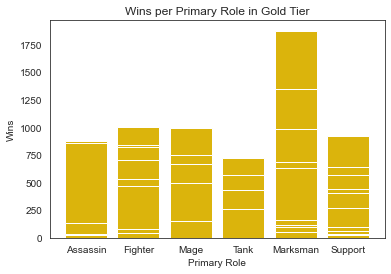

In [12]:
role = gold_combined_df['Primary Role']
wins = gold_combined_df['wins']

#order = ['Assassin', 'Fighter', 'Mage', 'Tank', 'Marksman', 'Support']

plt.bar(role,wins, align = "center", color= 'xkcd:gold')
plt.xlabel("Primary Role")
plt.ylabel("Wins")
plt.title('Wins per Primary Role in Gold Tier')
plt.show()

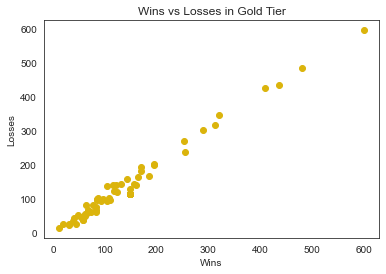

In [23]:
#wins vs losses from top 100 in randomized gold subset
wins = gold_combined_df['wins'][:100]
loss = gold_combined_df['losses'][:100]
plt.scatter(wins, loss, color = 'xkcd:gold')
plt.xlabel("Wins")
plt.ylabel("Losses")
plt.title("Wins vs Losses in Gold Tier")
plt.show()

In [21]:
#Average amount of wins for summoner in Gold Tier
gold_wins_avg = round(gold_combined_df['wins'].mean())
#Average amount of losses for summoner in Gold Tier
gold_loss_avg = round(gold_combined_df['losses'].mean())

print("The Average Amount of wins for summoner in Gold Tier :" , gold_wins_avg)
print("The Average Amount of losses for summoner in Gold Tier :" , gold_loss_avg)

The Average Amount of wins for summoner in Gold Tier : 124
The Average Amount of losses for summoner in Gold Tier : 122
